In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Conditional on 1 Signal

In [3]:
mu_v = 0
sig_v = 3

mu_e = 0
sig_e = 0.5

v = np.random.normal(mu_v, sig_v, 10000)
e = np.random.normal(mu_e, sig_e, (10000, 10000))

In [4]:
s = e + v
s[:5]

array([[-0.19328856,  4.83193731,  4.08255434, ..., -2.58594381,
         4.4693684 , -1.57291855],
       [-0.2468261 ,  3.46246249,  3.36283458, ..., -2.13898705,
         4.9409428 , -1.79782895],
       [-0.0306418 ,  4.02599026,  2.18912718, ..., -1.10417413,
         4.62993933, -1.55107022],
       [-0.36084591,  4.24725717,  2.39166038, ..., -1.67990597,
         4.24707555, -2.85864938],
       [-0.57180089,  3.46954241,  2.55291975, ..., -1.6669951 ,
         4.76394344, -2.30488417]])

In [5]:
v[:5]  # True value
e[1][:5]  # Noises
s[1][:5]  # All signals

array([-0.63526262,  3.61791609,  2.56956478, -6.22583519, -5.0010593 ])

array([ 0.38843652, -0.1554536 ,  0.79326979,  0.49769142,  0.14948209])

array([-0.2468261 ,  3.46246249,  3.36283458, -5.72814377, -4.85157721])

In [6]:
# s = np.array([[0.01, 0.04, 0.05, 0.051, 0.06]])
# np.where(np.logical_and(s >= t - 0.001, s <= t + 0.001))

In [7]:
t = 0.5  # Observed signal
u = 0.001

# Backout all possible true values
# len(np.where(np.logical_and(s >= t - u, s <= t + u))[1])
v_dist = v[np.where(np.logical_and(s >= t - u, s <= t + u))[1]]
len(v_dist)

26679

In [8]:
np.mean(v_dist)  # Simulate first moment
np.std(v_dist) ** 2  # Simulate second moment

0.4850519295000638

0.2420771905541098

In [9]:
mu_v_t = mu_v + (t - mu_v - mu_e) * (sig_v ** 2) / (sig_v ** 2 + sig_e ** 2)  # Derived first moment
sig_v_t = (sig_e ** 2 * sig_v ** 2) / (sig_v ** 2 + sig_e ** 2)  # Derived second moment

mu_v_t
sig_v_t

0.4864864864864865

0.24324324324324326

## Distribution Plot

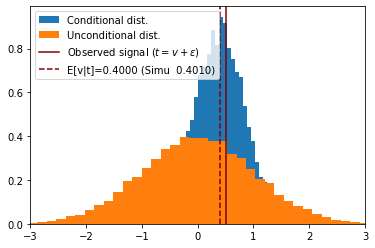

In [39]:
def plot(t=0.5, v=(0, 1), e=(0, 0.5), u=0.001):
    
    mu_v, sig_v = v
    mu_e, sig_e = e

    v = np.random.normal(mu_v, sig_v, 10000)
    e = np.random.normal(mu_e, sig_e, (10000, 10000))
    s = v + e
    
    v_dist = v[np.where(np.logical_and(s >= t - u, s <= t + u))[1]]
    
    mu_v_t = mu_v + (t - mu_v - mu_e) * (sig_v ** 2) / (sig_v ** 2 + sig_e ** 2)  # Derived first moment

    plt.hist(v_dist, density=True, bins=50, label='Conditional dist.')
    plt.hist(v, density=True, bins=50, label='Unconditional dist.')
    plt.axvline(t, c='maroon', label='Observed signal ($t=v+\epsilon$)')
    plt.axvline(mu_v_t, c='maroon', ls='--', label=f'E[v|t]={mu_v_t:.4f} (Simu {np.mean(v_dist): .4f})')
    plt.legend()
    ax = plt.gca()
    ax.set_xlim(mu_v - 3, mu_v + 3)
    
    plt.show()
    
plot()

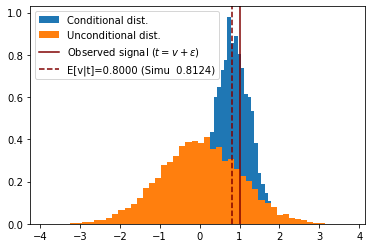

In [91]:
plot(t=1, v=(0, 1), e=(0, 0.5))  # The discount rate on signal is fixed by the beta=Cov(v,t)/Var(v)

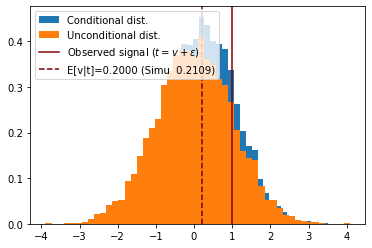

In [92]:
plot(t=1, v=(0, 1), e=(0, 2))  # When noise is large (sig_e), the information given by signal is trivial.

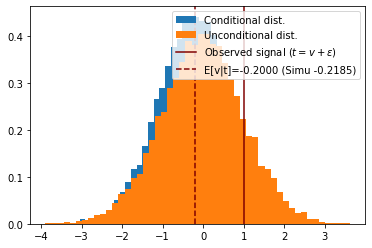

In [93]:
plot(t=1, v=(0, 1), e=(2, 2))  # When noise persistently enlarge the signal, the conditional expectation should be actually quite small.

## Scatter Plot

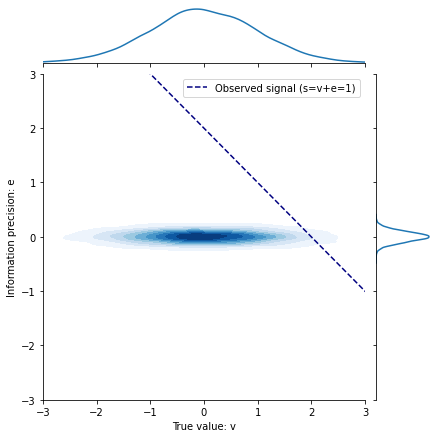

In [40]:
def joint_plot(t=0.5, v=(0, 1), e=(0, 0.5)):
    
    mu_v, sig_v = v
    mu_e, sig_e = e

    v = np.random.normal(mu_v, sig_v, 10000)
    e = np.random.normal(mu_e, sig_e, 10000)
    s = v + e

    jg = sns.jointplot(x=v, y=e, cmap="Blues", shade=True, kind='kde', xlim=(mu_v - 3, mu_v + 3), ylim=(mu_e - 3, mu_e + 3))
    jg.ax_joint.plot([t + 3, t - 3], [t - 3, t + 3], c='navy', ls='--', label=f'Observed signal (s=v+e={t})')
    jg.ax_joint.set_ylabel('Information precision: e')
    jg.ax_joint.set_xlabel('True value: v')
    
    jg.ax_joint.legend()
    plt.show()
    
joint_plot(t=1, e=(0, 0.1))

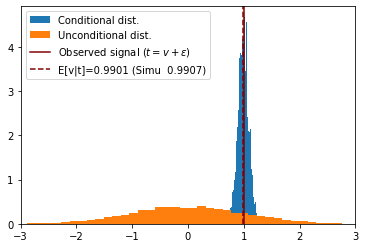

In [41]:
plot(t=1, e=(0, 0.1))

# Conditional on 2 Signals

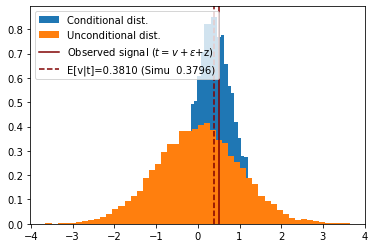

In [94]:
def plot(t=0.5, v=(0, 1), e=(0, 0.5), z=(0, 0.25), u=0.001):
    
    mu_v, sig_v = v
    mu_e, sig_e = e
    mu_z, sig_z = z

    v = np.random.normal(mu_v, sig_v, 10000)
    e = np.random.normal(mu_e, sig_e, (10000, 10000))
    z = np.random.normal(mu_z, sig_z, (10000, 10000))
    s = v + e + z
    
    v_dist = v[np.where(np.logical_and(s >= t - u, s <= t + u))[1]]
    
    mu_v_t = mu_v + (t - mu_v - mu_e - mu_z) * (sig_v ** 2) / (sig_v ** 2 + sig_e ** 2 + sig_z ** 2)  # Derived first moment

    plt.hist(v_dist, density=True, bins=50, label='Conditional dist.')
    plt.hist(v, density=True, bins=50, label='Unconditional dist.')
    plt.axvline(t, c='maroon', label='Observed signal ($t=v+\epsilon$+z)')
    plt.axvline(mu_v_t, c='maroon', ls='--', label=f'E[v|t]={mu_v_t:.4f} (Simu {np.mean(v_dist): .4f})')
    plt.legend()
    
    plt.show()
    
plot()

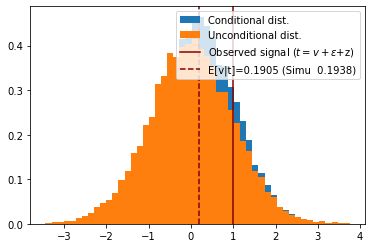

In [95]:
plot(t=1, v=(0, 1), e=(0, 0.5), z=(0, 2))  # When noise is large (sig_e), the information given by signal is trivial.